In [63]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Visualization
import plotly.io as pio
pio.renderers.default = "vscode"
import matplotlib.pyplot as plt
import plotly.io as pio

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

import pickle
import joblib

#### EDA

In [64]:
dataset = pd.read_csv('get_around_pricing_project.csv')
dataset.head()

,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


In [65]:
dataset.shape

(4843, 15)

In [66]:
dataset.describe(include='all')

,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
count,4843.000000,4843,4.843000e+03,4843.00000,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843.000000
unique,NaN,28,NaN,NaN,4,10,8,2,2,2,2,2,2,2,NaN
top,NaN,Citroën,NaN,NaN,diesel,black,estate,True,True,False,False,False,False,True,NaN
freq,NaN,969,NaN,NaN,4641,1633,1606,2662,3839,3865,3881,2613,3674,4514,NaN
mean,2421.000000,NaN,1.409628e+05,128.98823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.214536
std,1398.198007,NaN,6.019674e+04,38.99336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.568268
min,0.000000,NaN,-6.400000e+01,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
25%,1210.500000,NaN,1.029135e+05,100.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.000000
50%,2421.000000,NaN,1.410800e+05,120.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.000000
75%,3631.500000,NaN,1.751955e+05,135.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.000000


Valeurs manquantes

In [67]:
dataset.isnull().sum()

Unnamed: 0                   0
model_key                    0
mileage                      0
engine_power                 0
fuel                         0
paint_color                  0
car_type                     0
private_parking_available    0
has_gps                      0
has_air_conditioning         0
automatic_car                0
has_getaround_connect        0
has_speed_regulator          0
winter_tires                 0
rental_price_per_day         0
dtype: int64

Pas de valeurs manquantes dans ce dataset

In [68]:
dataset.columns

Index(['Unnamed: 0', 'model_key', 'mileage', 'engine_power', 'fuel',
       'paint_color', 'car_type', 'private_parking_available', 'has_gps',
       'has_air_conditioning', 'automatic_car', 'has_getaround_connect',
       'has_speed_regulator', 'winter_tires', 'rental_price_per_day'],
      dtype='object')

On supprime la colonne "Unnamed: 0" de type identité

In [69]:
dataset.drop("Unnamed: 0", axis=1, inplace=True)
dataset.head()

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


Répartition des véhicules par marques

In [70]:
count_state = dataset['model_key'].value_counts()
count_state

model_key
Citroën        969
Renault        916
BMW            827
Peugeot        642
Audi           526
Nissan         275
Mitsubishi     231
Mercedes        97
Volkswagen      65
Toyota          53
SEAT            46
Subaru          44
Opel            33
Ferrari         33
PGO             33
Maserati        18
Suzuki           8
Porsche          6
Ford             5
KIA Motors       3
Alfa Romeo       3
Fiat             2
Lexus            2
Lamborghini      2
Mini             1
Mazda            1
Honda            1
Yamaha           1
Name: count, dtype: int64

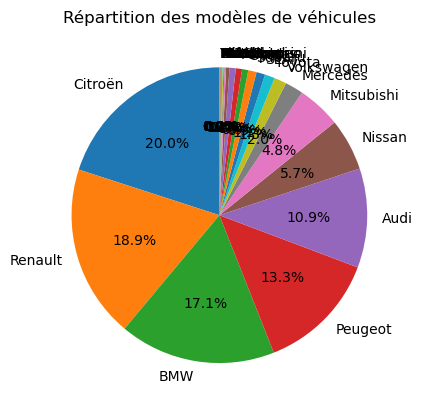

In [71]:
plt.pie(count_state, labels=count_state.index, autopct='%1.1f%%', startangle=90)
# plt.axis('equal')  
plt.title('Répartition des modèles de véhicules')
plt.show()

Les marques Citroën, Renault et BMW sont les plus représentées

#### Model

La variable cible est : <b>rental_price_per_day</b>

In [72]:
features_list = ['model_key', 'mileage', 'engine_power', 'fuel', 'paint_color', \
                 'car_type', 'private_parking_available', 'has_gps', \
                 'has_air_conditioning', 'automatic_car', 'has_getaround_connect', \
                 'has_speed_regulator', 'winter_tires']
target_variable = 'rental_price_per_day'

In [73]:
X = dataset.loc[:, features_list]
Y = dataset.loc[:, target_variable]

In [74]:
# Automatically detect names of numeric/categorical columns
numeric_features = []
categorical_features = []
for col, typ in X.dtypes.items():
    if "float" in str(typ) or "int" in str(typ):
        numeric_features.append(col)
    else:
        categorical_features.append(col)

print("Variables numeriques")
display(numeric_features)
print("Variables catégorielles")
display(categorical_features)

Variables numeriques


['mileage', 'engine_power']

Variables catégorielles


['model_key',
 'fuel',
 'paint_color',
 'car_type',
 'private_parking_available',
 'has_gps',
 'has_air_conditioning',
 'automatic_car',
 'has_getaround_connect',
 'has_speed_regulator',
 'winter_tires']

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#### Preprocessing

In [76]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop="first")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [77]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print("...Done")
print(X_train[0:5,:])
print()

with open('preprocessor_model.pkl', 'wb') as file:
    pickle.dump(preprocessor, file)

Performing preprocessings on train set...
     model_key  mileage  engine_power    fuel paint_color car_type  \
1215   Renault   119515           135  diesel        grey   estate   
432    Citroën   234365           135  diesel       black   estate   
4244       BMW    77356           105  diesel       black      suv   
289    Peugeot   181297           105  diesel       brown   estate   
2585   Citroën   144089           137  petrol       black    sedan   

      private_parking_available  has_gps  has_air_conditioning  automatic_car  \
1215                      False     True                 False          False   
432                        True     True                 False          False   
4244                      False     True                 False          False   
289                       False     True                 False          False   
2585                       True     True                 False          False   

      has_getaround_connect  has_speed_regulator  

In [78]:
# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head())
X_test = preprocessor.transform(X_test)
print("...Done")
print(X_test[0:5,:])
print()

Performing preprocessings on test set...
     model_key  mileage  engine_power    fuel paint_color   car_type  \
3203   Renault   109839           135  diesel       black      sedan   
1957  Mercedes   180032           105  diesel        grey  hatchback   
1044      Audi   147699           190  diesel        grey     estate   
2732   Renault    95241            85  diesel        blue      sedan   
1538       PGO   133214           190  diesel       black     estate   

      private_parking_available  has_gps  has_air_conditioning  automatic_car  \
3203                       True     True                 False          False   
1957                       True     True                 False          False   
1044                       True     True                 False           True   
2732                      False     True                 False          False   
1538                       True     True                 False          False   

      has_getaround_connect  has_speed_

In [79]:
# Train model
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [80]:
with open('regressor_model.pkl', 'wb') as file:
    joblib.dump(regressor, file)

In [81]:
print("R2 score on training set : ", regressor.score(X_train, Y_train))
print("R2 score on test set : ", regressor.score(X_test, Y_test))

R2 score on training set :  0.7140101652470408
R2 score on test set :  0.6937157355028851


In [82]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = regressor.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[130.36344011  97.22538885 129.55151715 ... 194.83611382 137.83696187
 139.61139545]



In [83]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = regressor.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[141.03972696 112.49354717 150.376337   116.67976042 128.32085642
  80.25898304  99.35919775 133.03255908 144.27453822 111.60607434
  96.69814272 109.63086344 104.86552565 148.02677483 124.86152214
 107.81456534 154.88012134 176.08452829  91.02433513 132.77904724
 190.40758242 114.27115267 101.2270027  137.05992445 107.06219804
  82.68438952  98.2155255  100.15710652 119.4654334  134.517888
  87.2837243   93.94101092 108.55654281 101.72237056 132.79122993
 122.35796494 121.65830105 125.30009497 111.807345   197.59642515
 113.37592805 134.2129937  142.27003647  99.7199969  146.74903977
  95.0593251  122.56897111 154.62577034 114.38678324  95.24651169
 124.81255904  96.4624713  100.11700485 179.35683037 100.89201073
  89.52481832 184.95553863 117.89239152 150.36954395 111.18954289
 134.90940747 142.49931113 140.44290374 100.56007729  92.26304369
 124.88154703 132.44655974 106.5452966  107.4614939  100.90589131
 118.07230955  85.68737128 157.60821063 14

API Prédiction Prix : https://dom-getaround-predict-price-2f8f063b1ae5.herokuapp.com/docs#/default/predict_predict_post